# E01 - Simple Linear Regression

### Problem Statement:

Suppose you are the CEO of a restaurant franchise and are considering different cities for
opening a new outlet. The chain already has trucks in various cities and you have data for profits
and populations from the cities. You would like to use this data to help you select which city to
expand to next. The file ex1data1.txt contains the dataset for linear regression problem. The first
column is the population of a city and the second column is the profit of a food truck in that city.
A negative value for profit indicates a loss. Make the predictions on profits in areas of 35000 and
70,000 people.

In short we are going to predict __profit for given population__ .

Dependent variable :- ___profit___ .

Independent variable :- ___population__


In [1]:
%  loading data
data = load('ex31.txt');

% Create Matrix of Training Examples
X = data(:,1); % Indexing in Octave Starts from one  
y = data(:,2);
m = length(y);

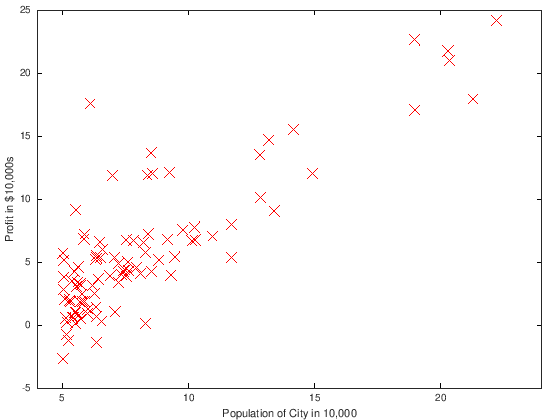

In [2]:
% Plotting data
plot(X, y, 'rx', 'MarkerSize', 10)
xlabel('Population of City in 10,000');
ylabel('Profit in $10,000s');
axis([4,24,-5,25]);

In [3]:
% Let's check correlation between the data
correln = corr(X,y);
fprintf('Correlation between the data is:- %.3f\n',correln);

Correlation between the data is:- 0.838


In [4]:
%Setting Gradient descent settings
iterations = 15000;
alpha = 0.01;
theta = zeros(2, 1); % initialize fitting parameters

In [5]:
% Cost Function
function J = cost(X, y, theta, m)
    i = 1:m;
    J = (1/(2*m)) * sum( ( (theta(1) + theta(2).*X(i,1)) - y(i)).^2 );
end

In [6]:
% Gradient Descent function
function theta = gradientDescent(X, y, theta, alpha, iterations, m)
    
    for iter = 1:iterations
        
        k = 1:m;
        t0 = theta(1) - (alpha/m) * sum( (theta(1) + theta(2).*X(k,1)) - y(k) );
        t1 = theta(2) - (alpha/m) * sum(((theta(1) + theta(2).*X(k,1)) - y(k) ).*X(k,1));
        
        theta(1) = t0;
        theta(2) = t1;        
    end
end 

In [7]:
% Compute and display initial cost
initial_cost = cost(X, y, theta, m);
fprintf('\nInitial cost before running Gradient Descent is %f\n',initial_cost);


Initial cost before running Gradient Descent is 32.072734


In [8]:
% Gradient Descent
theta = gradientDescent(X, y, theta, alpha, iterations, m);
fprintf('\nTheta found by Gradient Descent:- %f %f\n',theta(1), theta(2));
fprintf('\nCost after completing Gradient Descent:- %f\n', cost(X, y, theta, m));


Theta found by Gradient Descent:- -3.895781 1.193034

Cost after completing Gradient Descent:- 4.476971


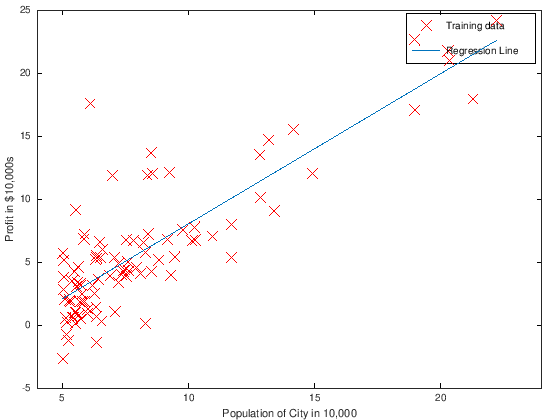

In [9]:
% Plotting the Regression line
plot(X, y, 'rx', 'MarkerSize', 10)
xlabel('Population of City in 10,000');
ylabel('Profit in $10,000s');
axis([4,24,-5,25]);
hold on;
plot(X(:,1), theta(1)+X*theta(2), '-','Linewidth',2);
legend('Training data','Regression Line');
hold off;

In [10]:
% Predict values for population sizes of 35,000 and 70,000
predict1 = theta(1) + 3.5*theta(2);
fprintf('\nFor population = 35,000, we predict a profit of %f\n',predict1*10000);
predict2 = theta(1) + 7*theta(2);
fprintf('For population = 70,000, we predict a profit of %f\n',predict2*10000);


For population = 35,000, we predict a profit of 2798.368764
For population = 70,000, we predict a profit of 44554.546310
